### Dynamic Programming 
#### Author: Alina Ozhegova
Date: 07/06/0219

### Asset Market Equilibrium

* 2 periods
* 4 states of the world: $s= {1,2,3,4}$
* Endowment of the first agent: $e^{1}=(1, 1, 2, 1, 2)$
* Endowment of the first agent: $e^{2}=(1, 3, 1, 3, 1)$;
* Asset 1 payoff: $(1,1,1,1)$
* Asset 2 payoff: $(1,1,1.5.1.5)$ \\

The utility function of agents looks as follows:
$$
\begin{array}{c}
\max_{\theta_{1},\theta_{2}} U(c)=v(c_0)+\dfrac{1}{4}\sum_{i=1}^{4}v(c_i)\\
\end{array}
$$
where
$v(c)=\dfrac{c^{1-\gamma}}{1-\gamma}$

Every agent chooses the amount of assets to hold that maximize his utility:
$$
\begin{array}{c}
\max_{\theta_{1},\theta_{2}} U(c^{z})=v(c_0)+\dfrac{1}{4}\sum_{i=1}^{4}v(c_i)\\
\end{array}
$$
where
$v(c)=\dfrac{c^{1-\gamma}}{1-\gamma}$

For all states in s, agents maximize their utility and choose over the amount of assets to hold: ($\theta^{h}_{1}$,$\theta^{h}_{2}$)

$$\begin{array}{c}
\max_{\theta^{h}_{1},\theta^{h}_{2}} U(c^{h})=v(c_0^{h})+E[v(c_s^{h})]\\
\end{array} $$
s.t. 
$$
\begin{array}{c}
c^h_{0}=e^h_{0}-q_{1}*\theta^h_{1}-q_{2}*\theta^h_{2} \\
c^h_{s}=e^h_{s}+A^1_{s} *\theta^h_{1}+A^2_{s} *\theta^h_{2}\\
\end{array}
$$

The first order conditions:
$$
\begin{array}{c}
-q_{1}v'(c^1_{0}) + E[v'(c^1_{s})A^1_{s})]=0\\
-q_{1}v'(c^2_{0}) + E[v'(c^2_{s})A^1_{s})]=0\\
-q_{2}v'(c^1_{0}) + E[v'(c^1_{s})A^2_{s})]=0\\
-q_{2}v'(c^2_{0}) + E[v'(c^2_{s})A^2_{s})]=0\\
\end{array}
$$

Market clearing conditions:

$$
\begin{array}{c}
\theta^1_1 +\theta^2_1=0\\
\theta^2_1 +\theta^2_2=0
\end{array}
$$

In [2]:
from scipy.optimize import fsolve
import numpy as np

In [10]:
gamma = 2

In [11]:
def Eq(x):
    res = np.zeros(6)
    theta11 = x[0]
    theta12 = x[1]
    theta21 = x[2]
    theta22 = x[3]
    q1 = x[4]
    q2 = x[5]
    c01 = 1 - q1 * theta11 - q2 * theta21
    c02 = 1 - q1 * theta12 - q2 * theta22
    c11 = 1 + theta11 + theta21
    c12 = 3 + theta12 + theta22
    c21 = 2 + theta11 + theta21
    c22 = 1 + theta12 + theta22
    c31 = 1 + theta11 + 1.5 * theta21
    c32 = 3 + theta12 + 1.5 * theta22
    c41 = 2 + theta11 + 1.5 * theta21
    c42 = 1 + theta12 + 1.5 * theta22
    res[0] = - q1 * c01**(-gamma) + 0.25 * (c11**(-gamma) + c21**(-gamma) + c31**(-gamma) + c41**(-gamma))
    res[1] = - q1 * c02**(-gamma) + 0.25 * (c12**(-gamma) + c22**(-gamma) + c32**(-gamma) + c42**(-gamma))
    res[2] = - q2 * c01**(-gamma) + 0.25 * (c11**(-gamma) + c21**(-gamma) + 1.5 * c31**(-gamma) + 1.5 * c41**(-gamma))
    res[3] = - q2 * c02**(-gamma) + 0.25 * (c12**(-gamma) + c22**(-gamma) + 1.5 * c32**(-gamma) + 1.5 * c42**(-gamma))
    res[4] = theta11 + theta12
    res[5] = theta21 + theta22
    return res

In [19]:
gamma = 2
fsolve(Eq, [0.1, -0.1, 0.1, -0.1, 1, 1])

array([  1.95406655e-02,  -1.95406655e-02,   1.18686543e-11,
        -1.18686543e-11,   5.89777656e-01,   7.37222070e-01])

In [20]:
gamma = 4
fsolve(Eq, [0.1, -0.1, 0.1, -0.1, 1, 1])

array([  4.02982364e-03,  -4.02982364e-03,   1.00341657e-12,
        -1.00341657e-12,   5.18661303e-01,   6.48326628e-01])

In [21]:
gamma = 8
fsolve(Eq, [0.1, -0.1, 0.1, -0.1, 1, 1])

array([  1.56094152e-04,  -1.56094152e-04,  -3.63402314e-12,
         3.63402314e-12,   5.01014401e-01,   6.26268001e-01])

In [24]:
gamma = 166
fsolve(Eq, [0.1, -0.1, 0.1, -0.1, 1, 1])
#It seems that increasing gamma the second assets gets less desired

/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


array([  2.77686917e-02,  -1.11099450e-02,  -8.37865820e-04,
         2.20259144e-02,   2.00466424e+21,  -3.49196270e+21])

### Tic Tac Toe

In [47]:
import copy

In [ ]:
class XO:
    def OpSign(self, sign):
        return 'O' if sign == 'X' else 'X' 

class Board:
    def __init__(self, size):
        self.s = size
        self.q = size  *size
        self.empty = [i for i in range(self.q)]
        self.grid = ['.'] * self.q
    def ins(self, move, sign):
        self.grid[move] = sign
        self.empty = [i for i in self.empty if i != move]
    def is_full(self):
        return not len(self.empty)
    def get_col(self, col):
        return [self.grid[i] for i in range(col - 1, self.q, self.s)] 
    def get_row(self, row):
        return self.grid[(row-1) * self.s:row * self.s] 
    def get_diag1(self):
        return [self.grid[i] for i in range(0, self.q, self.s + 1)] 
    def get_diag2(self):
        return [self.grid[i] for i in range(self.s - 1, self.q, self.s - 1)][:-1] 
    def __str__(self):
        return '\n'.join([' '.join(map(str,self.grid[i:i + self.s])) 
                for i in range(0, self.q, self.s)]) + '\n'

class Tree:
    def BestMove(self, board, depth, sign):
        if (board.empty == []): 
            return None
        BestMove = -(2**(board.s**2))
        m = board.empty[0]
        for move in board.empty:
            b = copy.deepcopy(board)
            b.ins(move, sign)
            if (self.Win(b, sign) or self.Win(b, xo.OpSign(sign))):
                return move
            CMove = self.Minimax(b, depth, False, xo.OpSign(sign))
            if (CMove > BestMove):
                BestMove = CMove
                m = move
        return m
    
    def Minimax(self, board, depth, MyTurn, sign):
        if (self.Win(board, xo.OpSign(sign))):
            if MyTurn: 
                return - (board.s**2+1) + depth
            else:
                return (board.s**2+1) - depth
                
        elif (board.is_full()):
            return 0
    
        if (MyTurn):
            BestValue = -(2**700)
            for move in board.empty: 
                b = copy.deepcopy(board)
                b.ins(move, sign)
                value = self.Minimax(b, depth + 1, not MyTurn, xo.OpSign(sign))
                BestValue = max([BestValue, value])
    
        else:
            BestValue = (2**700)
            for move in board.empty:
                b = copy.deepcopy(board)
                b.ins(move, sign) 
                value = self.Minimax(b, depth + 1, not MyTurn, xo.OpSign(sign))
                BestValue = min([BestValue, value])
        return BestValue
    
    def Win(self, board, sign):
        temp = board.s
        wins = []  
        for i in range(1, temp + 1):
            wins.append(board.get_col(i))
            wins.append(board.get_row(i))
        wins.append(board.get_diag1())
        wins.append(board.get_diag2())
    
        for i in wins:
            if (self.is_same(i, sign)):
                return True
            else:
                return False
    def is_same(self, l, sign):
        for i in l:
            if (i != sign):
                return False
            else:
                return True
            
xo = XO()
board = Board(3)
tree = Tree()
sign = 'O'
human = False
while not board.is_full() and not tree.Win(board, sign):
    sign = xo.OpSign(sign)
    human = not human
    if human:
        move = input('Your turn. Please input number from 0 to 8'.format(sign))
    else:
        print('Let me think...')
        move = tree.BestMove(board, 0, sign)
    board.ins(int(move), sign)
    print (board)

### Ramsey I

In [48]:
from matplotlib import pyplot as plt

#### For N = 50

In [49]:
beta = .9
N = 50 
k_low = .1 
k_high = 10 
k_grid = np.linspace(k_low, k_high, N).reshape(1, N) 
V_init = np.zeros((2, N))

In [50]:
u = lambda c: np.log(c)

In [52]:
def ActionValue(k_i, V_prev):
    V_prev = np.zeros((2, N))
    k = k_grid[0, k_i]
    action_value = np.zeros_like(V_prev) #(2,N)
    c = np.zeros_like(V_prev)
    c[0,:] = 0.9 * k**0.3 + 0.3 * k - k_grid 
    c[1,:] = 1.1 * k**0.3 + 0.9 * k - k_grid
    action_value[c <= 0] = - 999999 # negative consumption
    action_value[c > 0] = u(c[c > 0])
    EV = V_prev.mean(axis=0).reshape(1, N)
    action_value = action_value + beta * EV #(2,N)
    
    return action_value

In [53]:
def ValueFunctionUpdate(i, V_prev):
    V_upd = ActionValue(i, V_prev).max(axis=1)
    return V_upd

In [54]:
def VFUpdateIteration(V_prev):
    V_upd = np.zeros_like(V_prev)
    for ii in range(V_upd.shape[1]):
        V_upd[:,ii] = ValueFunctionUpdate(ii, V_prev)
    return V_upd

Iteration: 1
Iteration: 2
Converged after iteration 2


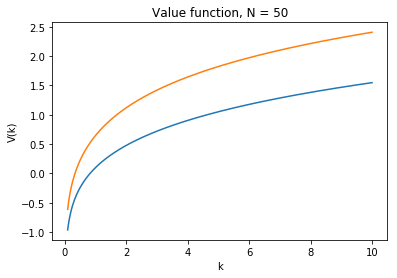

In [59]:
# For N = 50
MaxIters = 10000
DifList = []
t = 1e-10
PlotInterval = 50
V = V_init.copy()

for i in range(MaxIters):
    V_upd = VFUpdateIteration(V)
    diff = np.max(np.abs(V_upd - V))
    DifList.append(diff) 
    V = V_upd.copy()
    print('Iteration: {}'.format(i + 1))
    if diff < t:
        print('Converged after iteration {}'.format(i + 1))
        plt.figure()
        plt.plot(k_grid[0,:], V[0,:], label = 's=1')
        plt.plot(k_grid[0,:], V[1,:], label = 's=2')
        plt.xlabel('k')
        plt.ylabel('V(k)')
        plt.title('Value function, N = 50')
        plt.show();
        break

#### For N = 500

In [56]:
N = 500 
k_low = .1 
k_high = 10 
k_grid = np.linspace(k_low, k_high, N).reshape(1, N)
V_init = np.zeros((2, N))

Iteration: 1
Converged after iteration 1


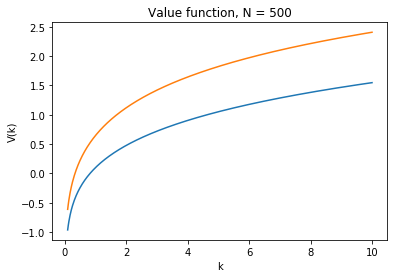

In [60]:
for i in range(MaxIters):
    V_upd = VFUpdateIteration(V)
    diff = np.max(np.abs(V_upd - V))
    DifList.append(diff) 
    V = V_upd.copy()
    print('Iteration: {}'.format(i + 1))
    if diff < t:
        print('Converged after iteration {}'.format(i + 1))
        plt.figure()
        plt.plot(k_grid[0,:], V[0,:], label = 's=1')
        plt.plot(k_grid[0,:], V[1,:], label = 's=2')
        plt.xlabel('k')
        plt.ylabel('V(k)')
        plt.title('Value function, N = 500')
        plt.show();
        break